## Problem

A company is known to have an acceptance marketing campaign level of around 14.91%, which is still considered lacking by management in facing business competition.

So that the management asked the marketing team to increase the acceptance level of the marketing campaign again so that the costs incurred by the company in carrying out marketing campaigns were more efficient and the amount of revenue they earned in the following years increased.

Therefore, the marketing team plans to implement a Targeted Marketing strategy with the help of the data science team to process historical sales data that they have previously recaptured and group users into a certain category according to their respective characteristics, so that they can be distinguished between those who deserve campaigns and those who don't get campaigns.

## Goal

Can increase the response rate of the company's campaign, so that the company's profit can increase. 

## Objective

Create a classification/clustering model prediction system that can determine the right targeting user. With this, of course, it will increase the value of predetermined business metrics such as traffic and sales performance. The system has determined which users are currently interested or part of the market for the campaign to be run.

## Business Metrics

- Response rate
- Revenue rate



---



---




#Stage 1 (EDA, Insight, Visualization)

## Exploratory Data Analysis

### 1. Descriptive Statistics

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('marketing_campaign.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Check Missing Value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Handling Missing Value, in case < 10% 
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# Check Duplicate 
df.duplicated().sum()

0

0

In [ ]:
# Check Value for each Columns -- Check Invalid Data 

for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

ID=
[    0     1     9 ... 11187 11188 11191]

Year_Birth=
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]

Education=
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']

Marital_Status=
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']

Income=
[  1730.   2447.   3502. ... 160803. 162397. 666666.]

Kidhome=
[0 1 2]

Teenhome=
[0 1 2]

Dt_Customer=
['2012-07-30' '2012-07-31' '2012-08-01' '2012-08-02' '2012-08-03'
 '2012-08-04' '2012-08-05' '2012-08-06' '2012-08-07' '2012-08-08'
 '2012-08-09' '2012-08-10' '2012-08-11' '2012-08-12' '2012-08-13'
 '2012-08-14' '2012-08-15' '2012-08-16' '2012-08-17' '2012-08-18'
 '2012-08-19' '2012-08-20' '2012-08-21' '2012-08-22' '2012-08-23'
 '2012-08-24' '2012-08-25' '2012-08-26' '20

In [ ]:
#change some data in some columns
df['Kidhome'] = df['Kidhome'].replace({0 : "no kid", 1: "1 kid", 2: "2 kids"})
df['Teenhome'] = df['Teenhome'].replace({0 : "no teen", 1: "1 teen", 2: "2 teens"})
df['AcceptedCmp1'] = df['AcceptedCmp1'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp2'] = df['AcceptedCmp2'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp3'] = df['AcceptedCmp3'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp4'] = df['AcceptedCmp4'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp5'] = df['AcceptedCmp5'].replace({0 : "didn't accept", 1: "accepted"})
df['Complain'] = df['Complain'].replace({0 : "no complain", 1: "complained"})
df['Response'] = df['Response'].replace({0 : "no respond", 1: "responded"})

In [ ]:
#categorized each column based on num or cat data type, column that has only 1 unique value (Z_CostContact and Z_Revenue) is not categorized
cats = ["Education", "Marital_Status", "Kidhome", "Teenhome","AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
        "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"]
num = ['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
       'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
       'NumStorePurchases','NumWebVisitsMonth']

In [ ]:
df[num].describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,3249.376275,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8421.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,3249.376275,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8421.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
df[cats].describe()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216
unique,5,8,3,3,2,2,2,2,2,2,2
top,Graduation,Married,no kid,no teen,didn't accept,didn't accept,didn't accept,didn't accept,didn't accept,no complain,no respond
freq,1116,857,1283,1147,2053,2052,2054,2074,2186,2195,1883


,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216
unique,5,8,3,3,2,2,2,2,2,2,2
top,Graduation,Married,no kid,no teen,didn't accept,didn't accept,didn't accept,didn't accept,didn't accept,no complain,no respond
freq,1116,857,1283,1147,2053,2052,2054,2074,2186,2195,1883


In [ ]:
#check variables of education and marital status
df[['Education', 'Marital_Status']].value_counts()
#there are some questionable data such as "Alone", "Absurd", "Yolo", "2nd cycle", "Master"

Education   Marital_Status
Graduation  Married           429
            Together          285
            Single            246
PhD         Married           190
Master      Married           138
Graduation  Divorced          119
PhD         Together          116
Master      Together          102
PhD         Single             96
2n Cycle    Married            80
Master      Single             75
2n Cycle    Together           56
PhD         Divorced           52
Master      Divorced           37
2n Cycle    Single             36
Graduation  Widow              35
PhD         Widow              24
2n Cycle    Divorced           23
Basic       Married            20
            Single             18
            Together           14
Master      Widow              11
2n Cycle    Widow               5
PhD         YOLO                2
Master      Alone               1
            Absurd              1
Graduation  Alone               1
            Absurd              1
Basic       Widow    

Education   Marital_Status
Graduation  Married           429
            Together          285
            Single            246
PhD         Married           190
Master      Married           138
Graduation  Divorced          119
PhD         Together          116
Master      Together          102
PhD         Single             96
2n Cycle    Married            80
Master      Single             75
2n Cycle    Together           56
PhD         Divorced           52
Master      Divorced           37
2n Cycle    Single             36
Graduation  Widow              35
PhD         Widow              24
2n Cycle    Divorced           23
Basic       Married            20
            Single             18
            Together           14
Master      Widow              11
2n Cycle    Widow               5
PhD         YOLO                2
Master      Alone               1
            Absurd              1
Graduation  Alone               1
            Absurd              1
Basic       Widow    

A. Are there columns with inappropriate data types, or column names and contents that don't match?

- The wrong data type is only in "Dt_Customer", where the data should have a date type instead of an object for column names and contents have not been considered more deeply

B. Do any of the columns have blank values? If so, what are they?

- Yes, only the income column

C. Is there a column that has a slightly odd summary value? (min/mean/median/max/unique/top/freq)

 - Yes, in the Education and Marital_Status sections (too many categories)

## Visualization

In [ ]:
cats = ['Education', 'Marital_Status']
nums_cats = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
nums_1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines'] 
nums_2 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases'] 
nums_3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
timestamp = ['Dt_Customer']

In [ ]:
#Displays the number of values per category
for col in cats:
    print(f'value count {col} column:')
    print(df[col].value_counts())
    print

value count Education column:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
value count Marital_Status column:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
value count Education column:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
value count Marital_Status column:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [ ]:
#categorical feature
# for i in range(0, len(cats)):
#     plt.subplot(2, len(cats), i+1)
#     sns.countplot(df[cats[i]], color='blue', orient='h')
#     plt.xticks(rotation = 45)
#     plt.tight_layout()

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\712943497.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_1[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\712943497.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_1[i]], colo

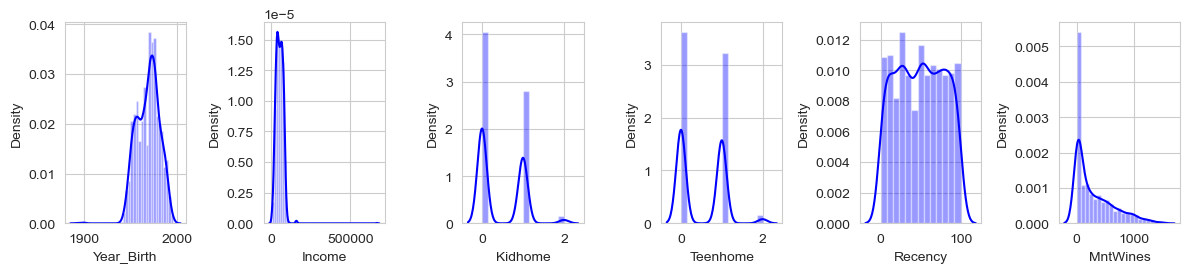

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\712943497.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_1[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\712943497.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_1[i]], colo

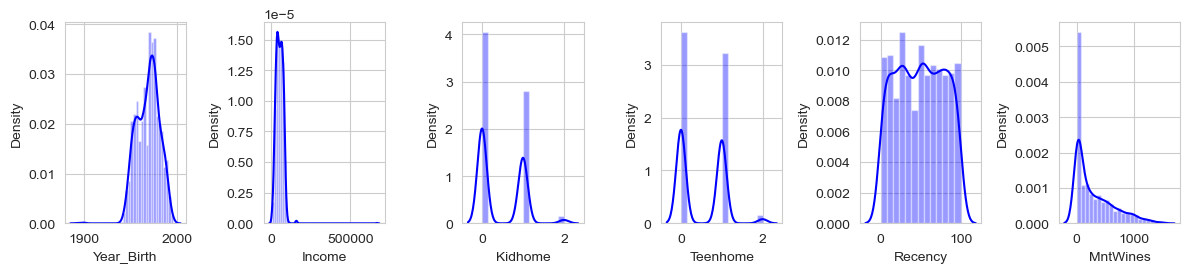

In [ ]:
df = pd.read_csv('marketing_campaign-1.csv', delimiter = ';')
df = df.dropna()
cats = ['Education', 'Marital_Status']
nums_cats = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
nums_1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines'] 
nums_2 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases'] 
nums_3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
timestamp = ['Dt_Customer']

plt.figure(figsize=(12,5))
for i in range(0, len(nums_1)):
    plt.subplot(2, len(nums_1), i+1)
    sns.distplot(df[nums_1[i]], color='blue')
    plt.tight_layout()

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1640748202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_2[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1640748202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_2[i]], colo

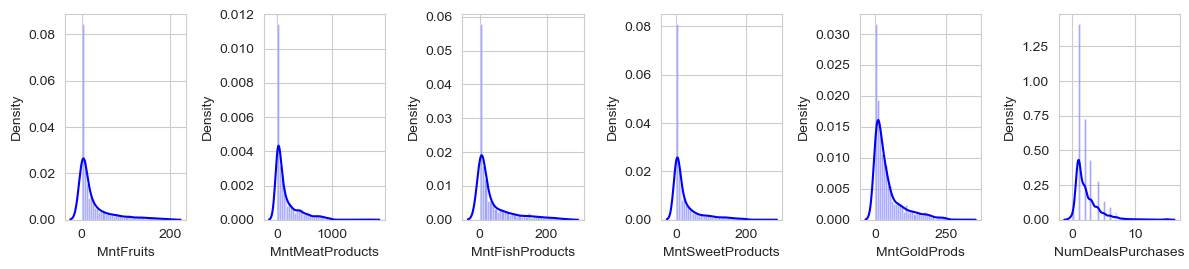

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1640748202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_2[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1640748202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_2[i]], colo

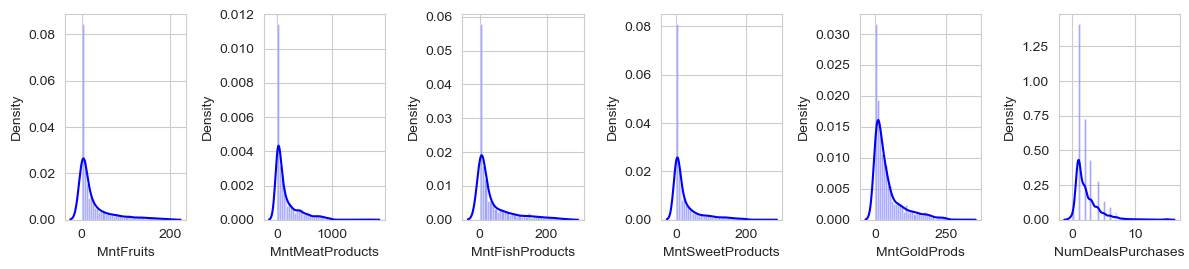

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_2)):
    plt.subplot(2, len(nums_2), i+1)
    sns.distplot(df[nums_2[i]], color='blue')
    plt.tight_layout()

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1376784690.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_3[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1376784690.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_3[i]], colo

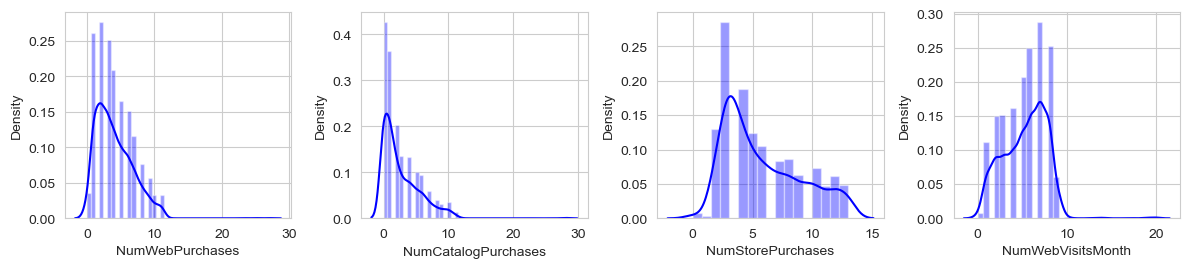

C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1376784690.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_3[i]], color='blue')
C:\Users\Muhammad-Anwaar\AppData\Local\Temp\ipykernel_212920\1376784690.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums_3[i]], colo

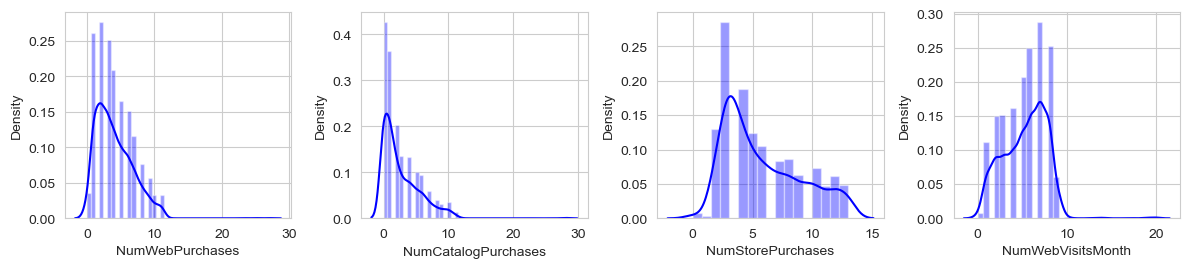

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_3)):
    plt.subplot(2, len(nums_3), i+1)
    sns.distplot(df[nums_3[i]], color='blue')
    plt.tight_layout()

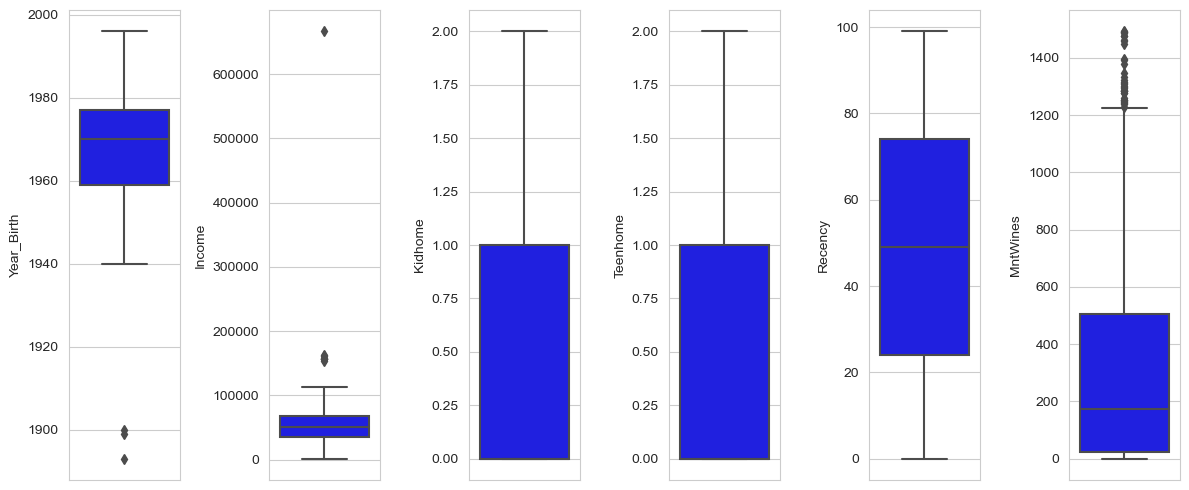

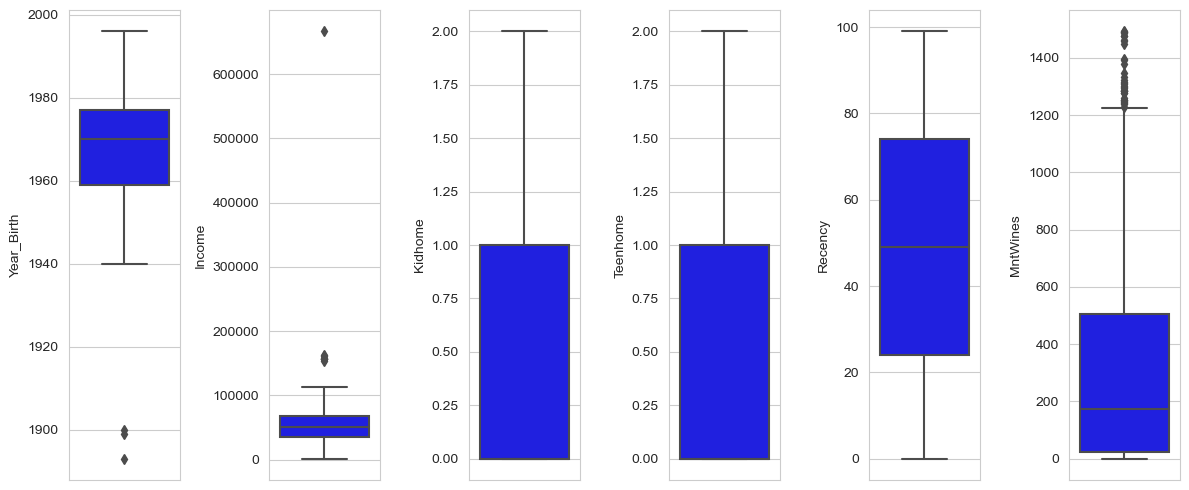

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_1)):
    plt.subplot(1, len(nums_1), i+1)
    sns.boxplot(y=df[nums_1[i]], color='blue', orient='v')
    plt.tight_layout()

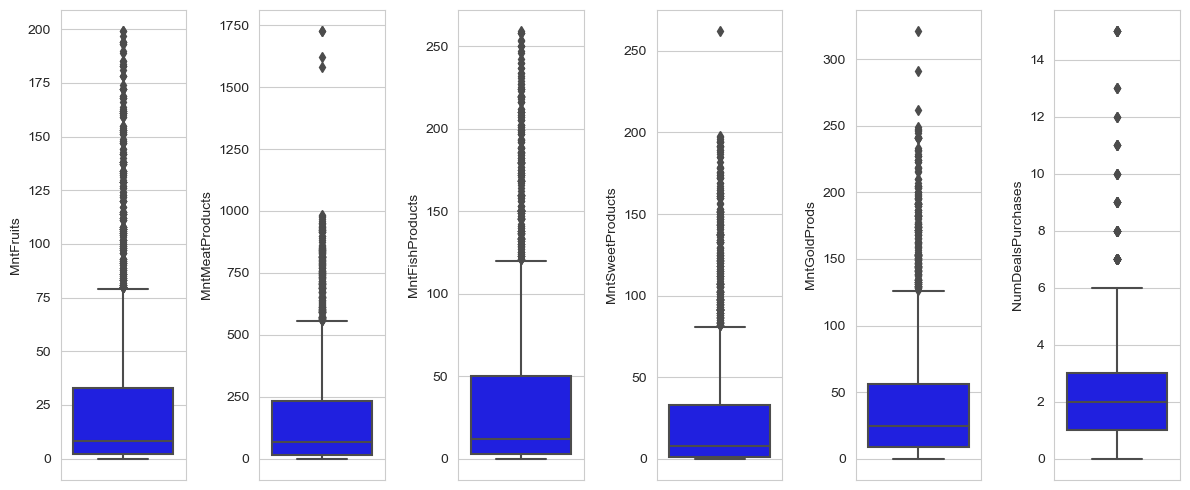

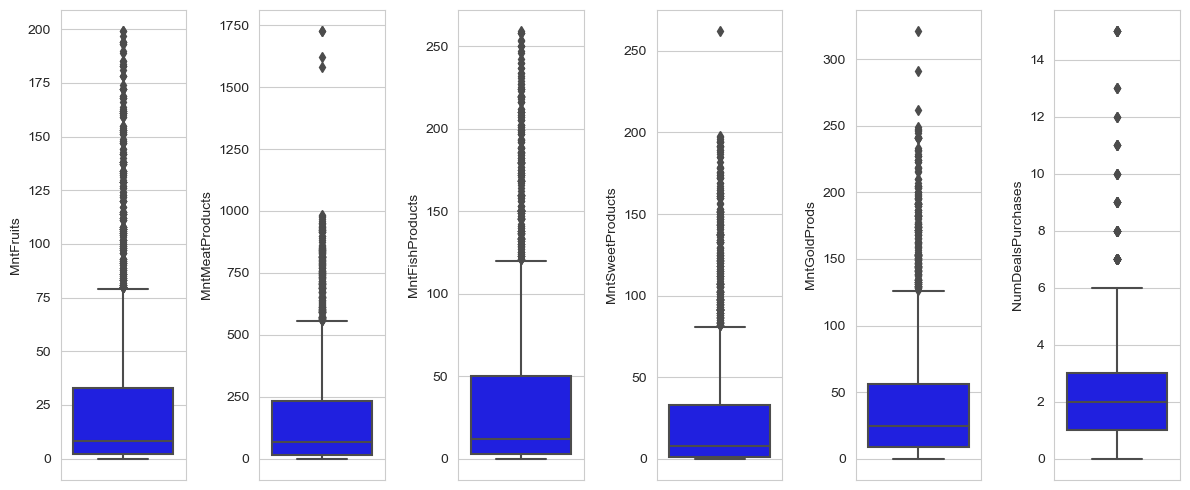

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_2)):
    plt.subplot(1, len(nums_2), i+1)
    sns.boxplot(y=df[nums_2[i]], color='blue', orient='v')
    plt.tight_layout()

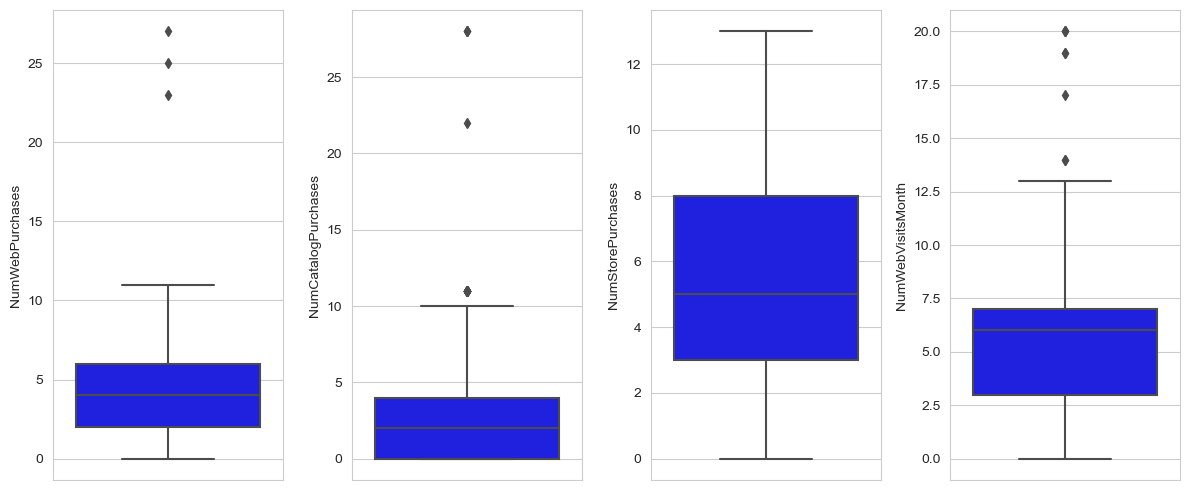

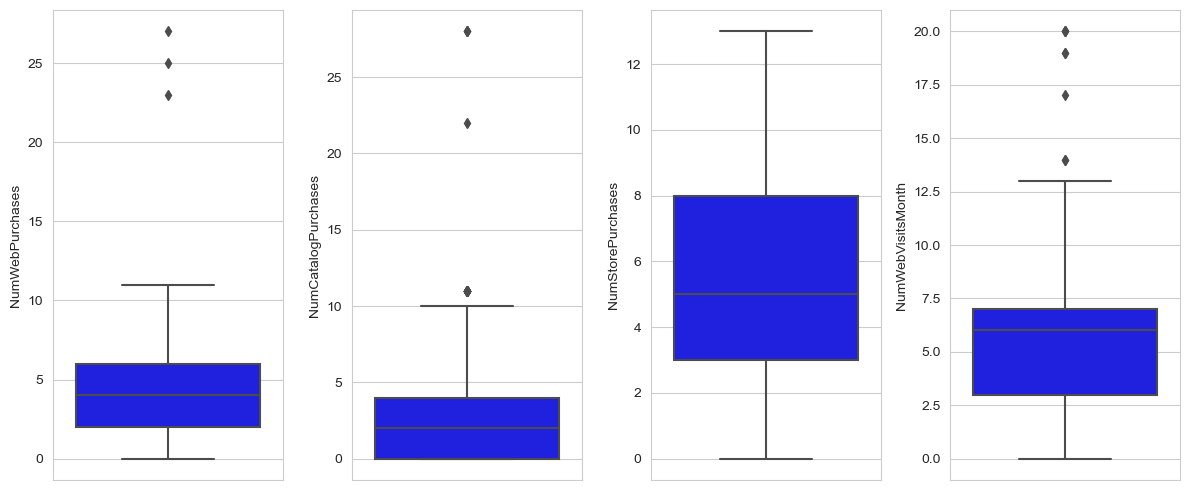

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_3)):
    plt.subplot(1, len(nums_3), i+1)
    sns.boxplot(y=df[nums_3[i]], color='blue', orient='v')
    plt.tight_layout()

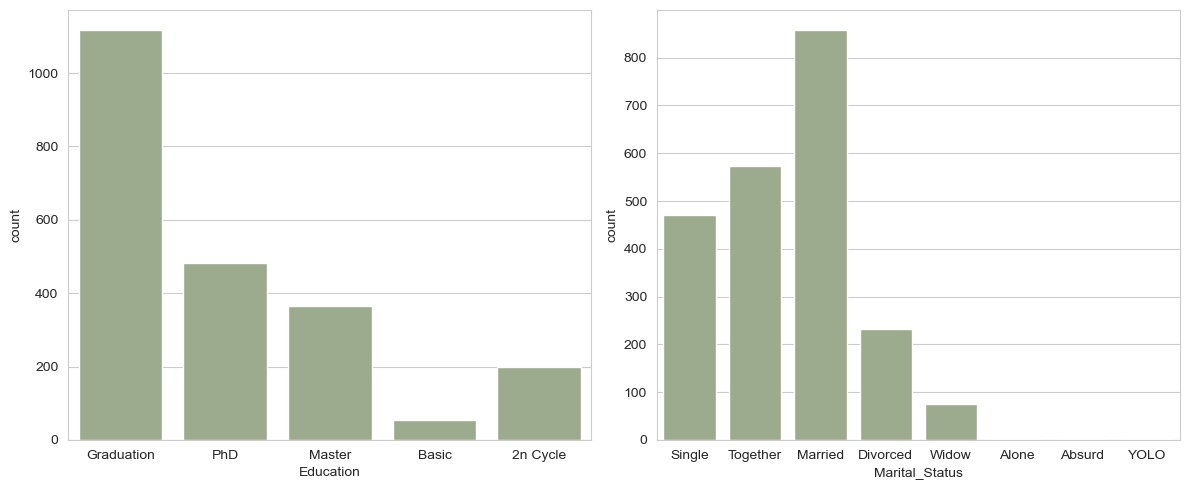

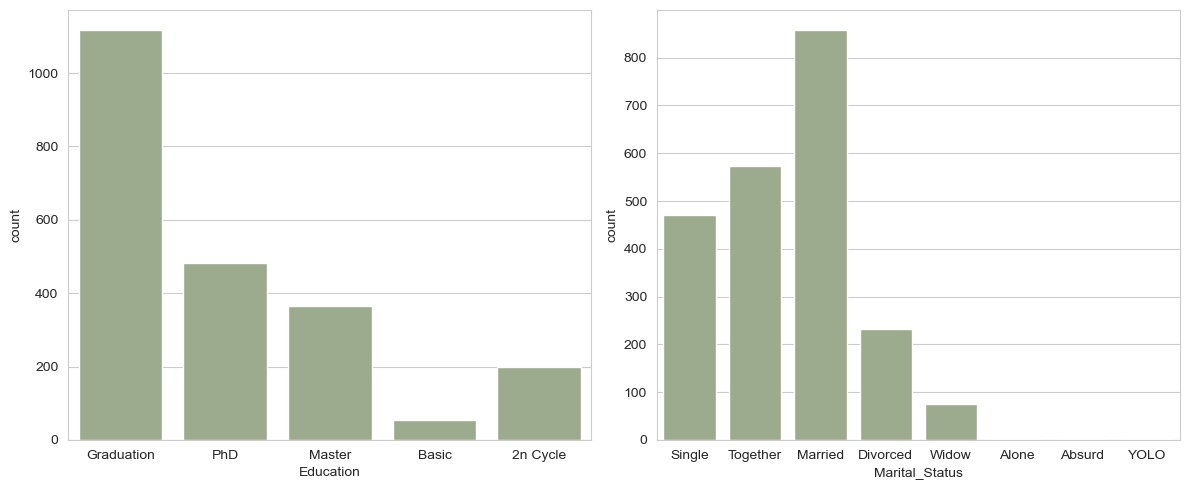

In [ ]:
#categorical feature
plt.figure(figsize=(12,5))
for i in range(0, len(cats)): 
  plt.subplot(1, len(cats), i+1)
  sns.countplot( x = df[cats[i]], color='#9CAF88')
  plt.tight_layout()

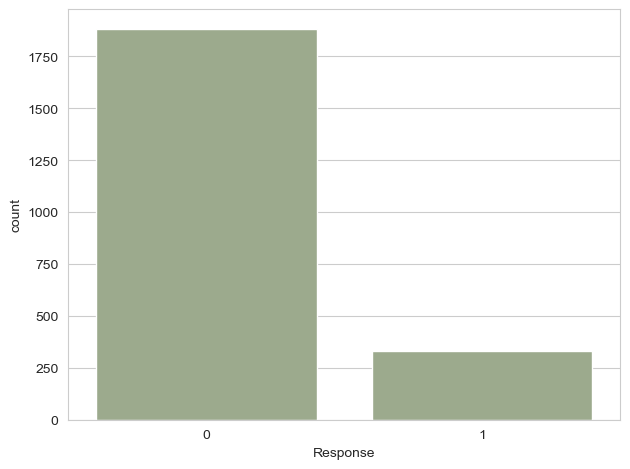

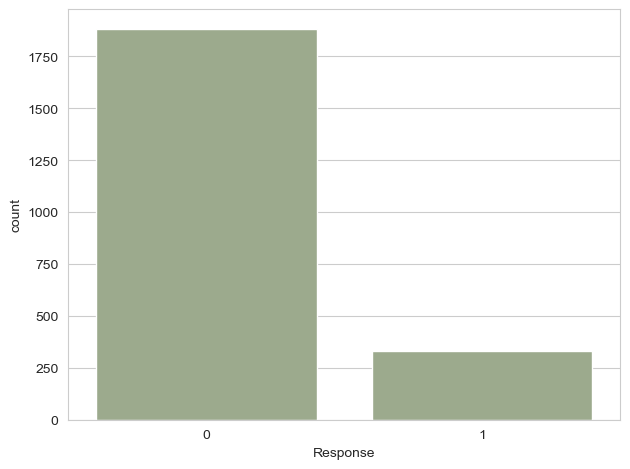

In [ ]:
sns.countplot( x = df['Response'], color='#9CAF88')
plt.tight_layout()

### 2. Univariate Analysis

Use visualization to see the distribution of each column (features and targets). Write down the results of the observations, for example if there is a column with an interesting distribution (eg skewed, bimodal, there are outliers, there are dominating values, there are too many categories, etc. Also explain what should be followed up during data pre-processing.

**ANSWER NOMOR 2**

A. CATS

Both Education and Marital_Status have too many categories. In the pre-processing stage, these two columns will be subjected to the feature engineering process.


B. NUMS
1. Year_Birth >> Negative Skew
2. Income >> Positive Skew
3. Kidhome >> Bimodal
4. Teenhome >> Bimodal
5. Recency >> Uniform
6. MntWines >> Positive Skew
7. MntFruits >> Positive Skew
8. MntMeatProducts >> Positive Skew
9. MntFishProducts >> Positive Skew
10. MntSweetProducts >> Positive Skew
11. MntGoldProds >> Positive Skew
12. NumDealsPurchases >> Positive Skew
13. NumWebPurchases >> Positive Skew
14. NumCatalogPurchases >> Positive Skew
15. NumStorePurchases >> Positive Skew
16. NumWebVisitsMonth >> Positive Skew


For the distribution of positive skew, in the data pre-processing process a log transformation will be carried out. For negative skew distribution, standardization will be carried out in the data pre-processing process.

C. OUTLIER
1. Year_Birth
2. Income
3. Recency
4. MntWines
5. MntFruits
6. MntMeatProducts
7. MntFishProducts
8. MntSweetProducts
9. MntGoldProds
10. NumDealsPurchases
11. NumWebPurchases
12. NumWebVisitsMonth

In the pre-processing process, columns that have outliers can be removed based on the z-score or using IQR.

D. there is an imbalance in the target column, namely the "response" column, which shows class imbalance, so it is necessary to do over/undersampling during preprocessing.

There is an imbalance in the target column, namely the response column, indicating class imbalance, so it is necessary to do over/undersampling during preprocessing

### 3. Multivariate Analysis

In [64]:
#find correlation between variables
df_for_corr =pd.read_csv('marketing_campaign-1.csv', delimiter=';')
df_for_corr.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [65]:
#drop ID, Z_CostContact, and Z_Revenue columns
df_for_corr = df_for_corr.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

<Axes: >

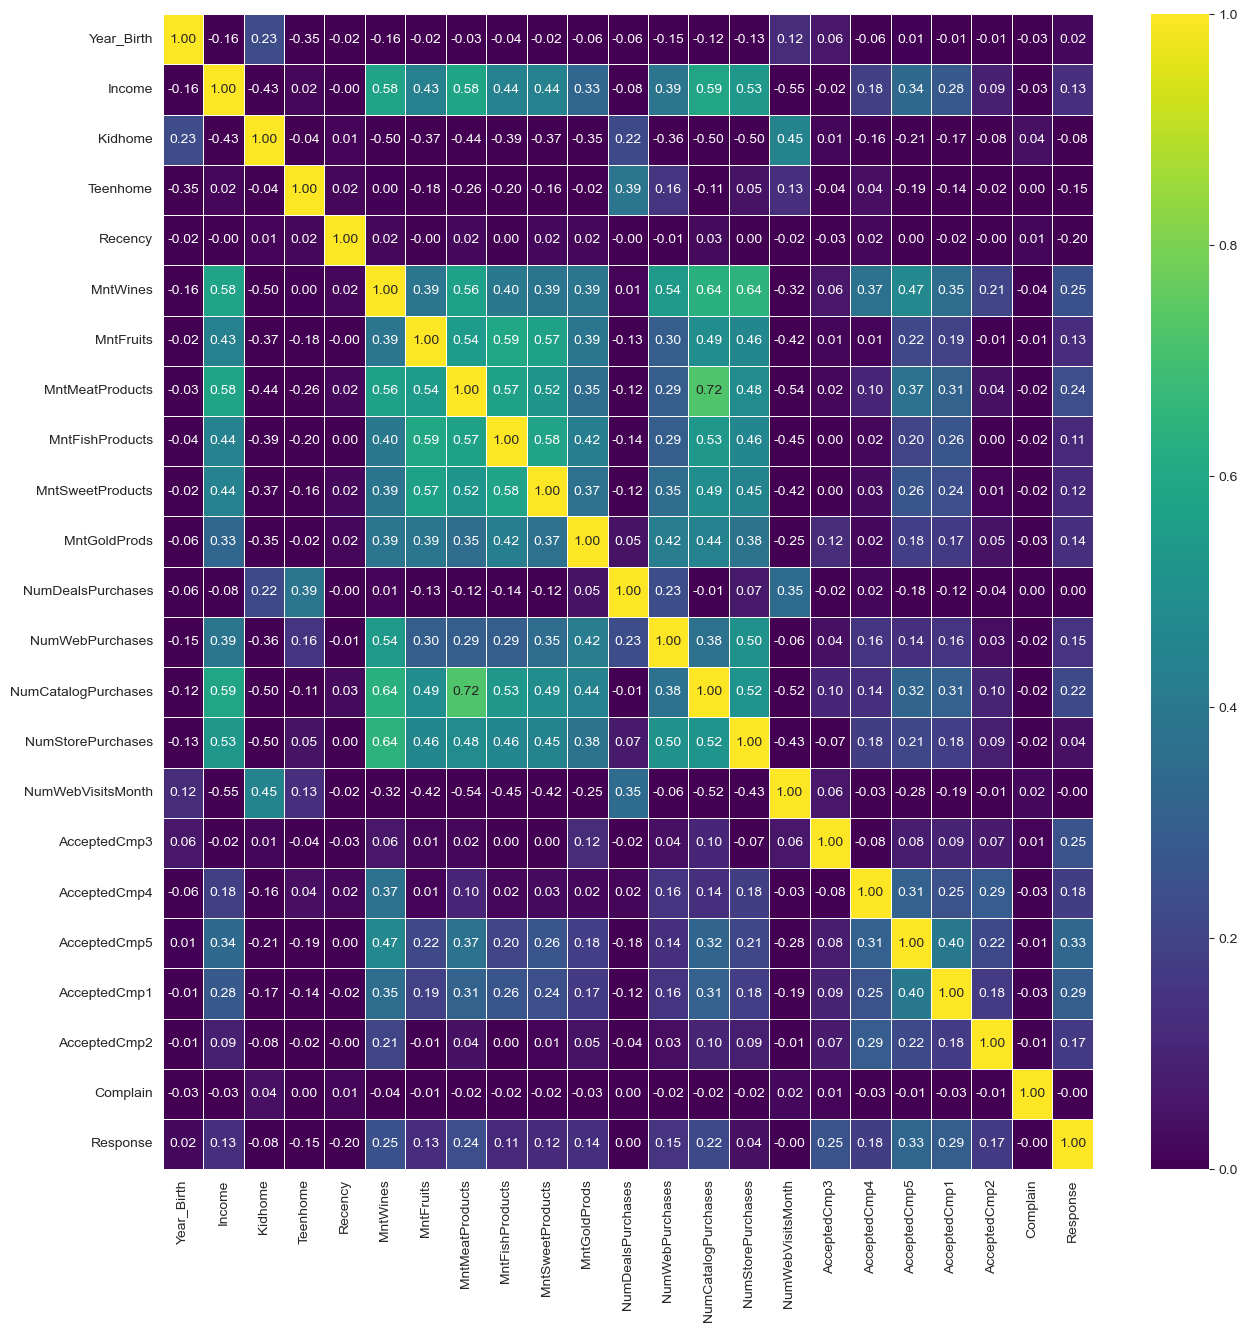

In [66]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')

KeyboardInterrupt: 

<Figure size 1800x800 with 0 Axes>

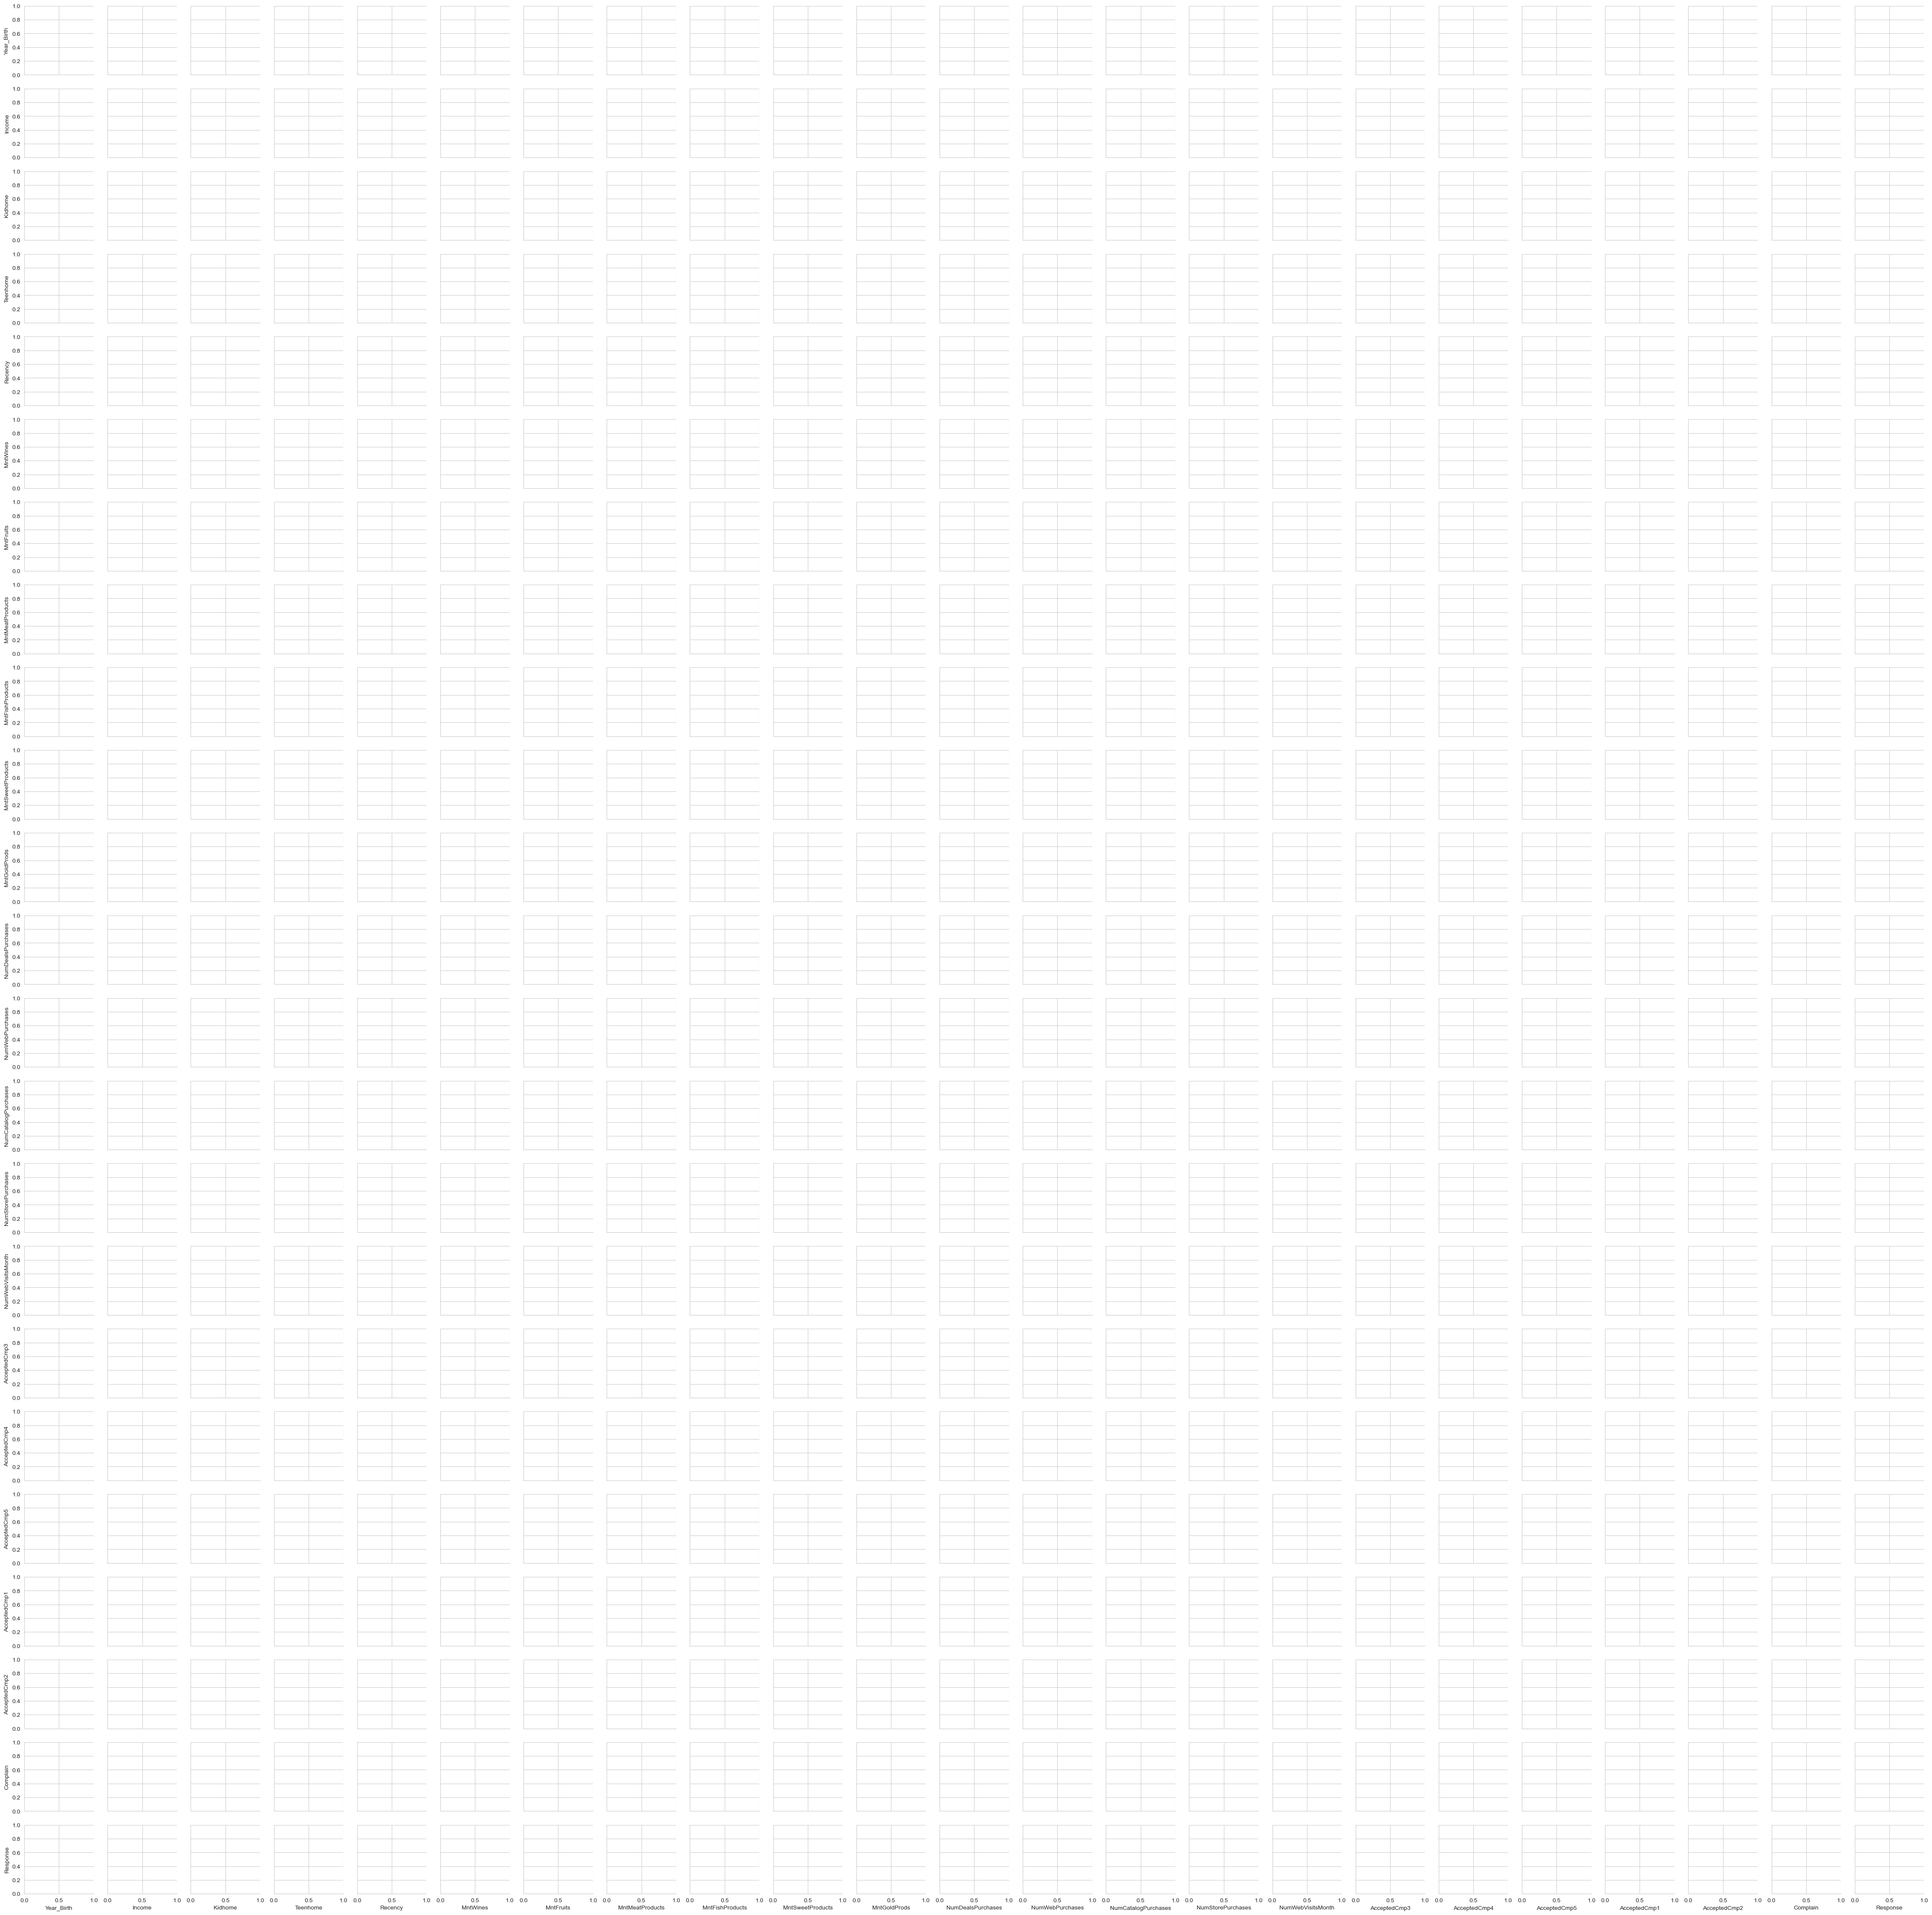

In [67]:
#PAIR PLOT -- Menggunakan Kolom-Kolom yang memiliki korelasi antara kolom dengan target / Response
#corrl = ['income', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases', 'numcatalogpurchases', 'acceptedcmp1']
plt.figure(figsize =(18,8))
sns.pairplot(df_for_corr, diag_kind='kde')

A. what is the correlation between each feature and label. Which features are the most relevant and must be maintained?

Here are some features that we might keep:
* Recency
* MintWines
* MintMeatProducts
* NumCatalogPurchases
* AcceptedCmp3
* AcceptedCmp5
* AcceptedCmp1
Of all the correlations between feature-targets, all are in the range of 0.00 to 0.33. Therefore, we decided to make the threshold value at 0.20. The features above that we maintain are features that have a correlation value > 0.20.

B. What is the correlation between features, are there any interesting patterns? What needs to be done with the feature?

Based on the initial analysis between features that we carried out on features that have a higher correlation with the target, the following results are obtained:

* [Recency]: Recency correlation value with other features has a range of 0.00 to 0.05

* [MntWines]: The following features correlate with MntWines: Income(0.58), NumCatalogPurchases(0.64), NumStorePurchases(0.64)

* [MntMeatProducts]: The following features correlate with MntMeatProducts: NumCatalogPurchases(0.72), Income(0.58), MntWines(0.56)

* [NumCatalogPurchases]: The following features correlate with NumCatalogPurchases: MntMeatProducts(0.72), MntWines(0.64),Income(0.59)

* [AcceptedCmp3]: The following features correlate with AcceptedCmp3: MntGoldProducts(0.12)

* [AcceptedCmp5]: The following features correlate with AcceptedCmp5: MntWines(0.47), MntMeatProducts(0.37), Income(0.34)

* [AcceptedCmp1]: The following features correlate with AcceptedCmp1: AcceptedCmp5(0.40), MntWines(0.35), MntMeatProducts(0.31), NumCatalogPurchases(0.31)


From these results, we will most likely use it as a priority feature in the decision to determine supporting indicators for categorizing which customers are eligible for campaigns.


## Business Insights & Recommendations

### Business Insights I

How does having a kidhome and teenhome affect customer response rates?

In [ ]:
df_visual = df.groupby(['Kidhome','Teenhome', 'Response'])['ID'].count().reset_index()
df_visual

In [ ]:
df_visual_pivot  = df_visual.pivot_table(index=["Kidhome","Teenhome"], 
                                         columns='Response', 
                                         values="ID")
df_visual_pivot

In [ ]:
df_visual_pivot['ratio_no_respond'] = (df_visual_pivot['no respond'] / (df_visual_pivot['no respond'] + df_visual_pivot['responded']))
df_visual_pivot['ratio_responded'] = (df_visual_pivot['responded'] / (df_visual_pivot['no respond'] + df_visual_pivot['responded']))
df_visual_pivot

In [ ]:

df_visual_pivot=df_visual_pivot[['ratio_no_respond','ratio_responded']].plot(kind="bar")

plt.title('Perbandingan ratio response dengan Customer yang memiliki Kid-Teen', fontsize = 16)
plt.xlabel('kid-teen', fontsize=12)
plt.ylabel('ratio response', fontsize=12)

# title and sub-title


# change x tick style
plt.xticks(rotation = 45)

### Business Insights II

What is the percentage of customers who respond and do not respond with marital status?

In [ ]:
plt.figure(figsize=(25, 25))

pd.crosstab(index=df['Response'], columns=df['Marital_Status']).plot(kind="pie", figsize=(16, 8), subplots=True, layout=(2,4),autopct='%1.0f%%', legend=False)
plt.show()

### Business Insights III 

What is the percentage of customers who respond and do not respond with the education level?

In [ ]:
plt.figure(figsize=(20, 20))

pd.crosstab(index=df['Response'], columns=df['Education']).plot(kind="pie", figsize=(16, 8), layout = (2,3), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

### Business Recommendations

The following is a summary of recommendations that can be provided by the Data Scientist Team to the Marketing Team:
* From the visualization of kidhome and teenhome, it can be seen that the customers who respond the most come from customers who don't have children and don't have teenagers (0.265403), so the marketing team can focus campaigns on customers who don't have children and don't have teenagers.
* From the visualization of the Marital Status piechart, it can be seen that the customers who responded the most came from customers with Absurd status (50%) and Yolo (50%), followed by Alone (33%) and Widow (25%), so that the marketing team could focus campaign to "Absurd" and "Yolo" customers.
* From the Education piechart visualization, it can be seen that the customers who responded the most came from customers who had PhD education (20.78%), followed by Masters (15.41%), so that the marketing team could focus campaigns on customers who had "PhD" education.

**Next Improvement**

Apart from these three business insights, we also have one more insight in the form of a product trend that has a strong correlation (Gold, Meat, and Wines) to campaigns 1 to campaign 5. Then, the results of this insight visualization can later be used by company to prioritize which products to sell or promote in order to attract the number of customers. So it is hoped that with an increase in the number of customers, the company's revenue can also increase.

However, due to time constraints, we have not had time to visualize the latest insights and plan to make them the next improvements.




---



---



#Stage 2 (Data PreProcessing)

In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Load data
df = pd.read_csv('marketing_campaign-1.csv', delimiter = ';')

#categorized each column based on num or cat data type, column that has only 1 unique value (Z_CostContact and Z_Revenue) is not categorized
cats = ['Education', 'Marital_Status'] #feature categorical and string
cats_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']  #feature categorical and int
nums_int = ['Year_Birth', 'Income', 'Recency']  #feature numerical and int
nums_product = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] #feature numerical and int
nums_purchase = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] #feature numerical and int
timestamp = ['Dt_Customer'] #feature timestamp

df

## Data Cleansing & Feature Engineering

### Handle Missing Values

In [ ]:
# check missing value

df.isna().sum()

In [ ]:
#calculating the percentage of null rows
percent_null = (df['Income'].isna().sum()) / len(df.index) * 100
percent_null

#####**Conclusion**

Based on the results of the initial analysis, it can be seen that there are 24 rows of blank data in the income column with a percentage of 1.07% of the total data, which means that it is far below the safe limit for data deletion (10%). So the decision we made regarding the missing value was to delete all rows in the Income column that had a null value (empty).

In [ ]:
#deleting rows with missing value
df.dropna(inplace = True)
df.info()

### Handle Duplicated Data

In [ ]:
#check any duplicated
df.duplicated().any()

#####**Conclusion**
Based on the checking results, no duplicate data rows were found. So we don't need to do duplicated data handling

### Handle Outliers

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df[nums_int[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df[nums_product[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df[nums_purchase[i]], color='blue', orient='v')
    plt.tight_layout()

####**Conclusion**
Based on the graph shown above, it can be seen that there are outliers in the features 'Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth'. So, we made improvements to this feature by using the Z-score method and also the IQR to minimize the number of outliers contained in the dataset.

#### Remove Outliers berdasarkan Z-score

In [ ]:
df_z = pd.read_csv('marketing_campaign-1.csv', delimiter = ';')
df_z.dropna(inplace = True)

print(f'jumlah baris sebelum memfilter outlier: {len(df_z)}')

filtered_enteries = np.array([True] * len (df_z))

for col in ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']:
    zscore = abs(stats.zscore(df_z[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df_z = df_z[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df_z)}')

#### Remove Outliers berdasarkan IQR

In [ ]:
df_iqr = pd.read_csv('marketing_campaign-1.csv', delimiter = ';')
df_iqr.dropna(inplace = True)

outliers = ['Year_Birth','Income','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

print(f'Jumlah baris sebelum filtering outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))

for i in outliers:
    Q1 = df_iqr[i].quantile(0.25)
    Q3 = df_iqr[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    filtered_entries = ((df_iqr[i] >= low_limit) & (df_iqr[i] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah filtering outlier: {len(df_iqr)}')

####**Conclusion**
Based on the results of calculations using the Z-score as well as the IQR, it can be seen that the number of deleted rows based on the IQR is far more than the Z-score, which is around >30% of the total deleted data rows. Therefore, we decided to choose the Z-score method to remove the outliers.

After that, we plotted boxplots to see again the distribution of outliers in each feature.

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df_z[nums_int[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df_z[nums_product[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df_z[nums_purchase[i]], color='blue', orient='v')
    plt.tight_layout()

### Feature Transformation

In [ ]:
df=df_z

In [ ]:
#check the graph for each outlier column

plt.figure(figsize=(20,20))
for i in range(0, len(outliers)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(df[outliers[i]], color='blue')
    plt.tight_layout()
    
    # make a vertical line of mean and median
    plt.axvline(x=df[outliers[i]].mean(), color = 'red')
    plt.axvline(x=df[outliers[i]].median(), color = 'green')

####**Explanation**
Based on the graph shown above, it can be seen that there is a positive skewed on the features 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases' . So, we made improvements to these features with feature transformation techniques using the log transformation method.

In [ ]:
positive_skewed = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']

# check skewness value
for i in positive_skewed:
    skewness = df[i].skew(axis=0, skipna=True)
    print('skewness feature',i,'adalah', skewness)

#### Log Transformation

In [ ]:
# log transformation for positively skewed features
plt.figure(figsize=(20,20))
for i in range(0, len(positive_skewed)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(np.log(df[positive_skewed[i]]+1), color='blue')
    plt.tight_layout()

In [ ]:
# check skewness value
for i in positive_skewed:
    skewness = np.log(df[i].skew(axis=0, skipna=True))
    print('skewness feature',i,'adalah', skewness)

####**Conclusion**

Based on the results of checking several features that have been processed using the previous log transformation, it can be seen that the overall skewness values have a more uniform range (not much and not too varied). So it can be concluded that the feature transformation technique that we have done is valid and we decided to create a new column filled with values for the features that have been processed.


In [ ]:
for i in positive_skewed:
    new_i = 'log_' + i
    df[new_i] = np.log(df[i]+1) #plus 1 to prevent -inf

In [ ]:
df.head()

### Feature Encoding

####**Explanation**
After performing feature transformation, here we also decide to perform feature encoding on columns that have categorical data types to be converted to numerical. We do this with the hope that the machine learning capabilities we create can improve. The following are some of the features we are working on at this stage:


1. Mapping_marital, based on Marital_status
2. Mapping_education, based on Education


#### Label Encoding

In [ ]:
mapping_marital = {
    'Absurd' : 0,
    'Alone' : 0,
    'Divorced' : 0,
    'Single' : 0,
    'Widow' : 0,
    'YOLO' : 0,
    'Together' : 1,
    'Married' : 1
}
df['Marital_Status'] = df['Marital_Status'].map(mapping_marital)
df.head()

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}
df['Education'] = df['Education'].map(mapping_education)
df

#### One Hot Encoding

In [ ]:
#menggabungkan value pada kolom education 
df.Education = df.Education.apply(lambda x : "Master" if (x=="2n Cycle") else x)

#One Hot Encoding 
prefix_educ = pd.get_dummies(df['Education'], prefix='is')

df = df.join(prefix_educ)
df

In [ ]:
df['Marital_Status'].value_counts()

In [ ]:
df

In [ ]:
df.info()

### Feature Extraction

####**Explanation**

After doing feature encoding, here we also decide to do feature extraction. We do this with the aim of facilitating the feature selection stages that will be carried out next. Here are some of the features we created at this stage:

1. primary_purchase & tertiary_purchase, which is a feature that combines the purchase columns for fruit, meat and fish, wine, sweets, and gold into 2 groups, namely primary and tertiary.
2. total_accepted_campaign, which is a feature that combines acceptedcmp 1 - 5. This feature is made to see customer intensity in accepting campaigns
of the entire campaign that has been carried out by the company.
3. total_revenue, which is a feature created by adding up the total customer acceptance in all previous campaigns (1-5) with the total revenue per accepted campaign.
4. total_spent, a feature that combines the total purchases of all products, from wines, fruits, meat, fish, sweet, to gold, to record the total expenditures made by each customer.
5. total_order, which is a feature that contains a summary of the total purchases or orders that have been made by customers from various purchase methods.
6. month_customer, which is the month feature where customers start enrolling/registering for marketing campaigns.
7. age, which is a feature that categorizes customers into 3 age groups, namely: Elderly (2), Middle Age (1), and Young (0).
8. income_category, which is a feature that categorizes customers based on their income into 3 categories, namely High-Income (2), Mid-Income (1), and Low-Income (0)
9. total_dependents, a feature that combines the marital status, kidhome, and teen home columns to see the number of people in 1 house who are considered household dependents.

All of these features will later be re-tested during feature selection to see how much influence they have on the target or response probability given by the customer in a campaign

In [ ]:
# primer and tersier product
df['primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]
df.sample(5)

In [ ]:
# total accepted campaign
df['total_accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.sample(5)

In [ ]:
# total revenue
df['total_revenue'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + 
                       df['AcceptedCmp4'] + df['AcceptedCmp5']) * df['Z_Revenue']
df[['Z_Revenue', 'total_revenue']].sample(5)

In [ ]:
# total spent
df["total_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df.sample(5)

In [ ]:
# total purchase
df['total_order'] = df['NumDealsPurchases']+df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.sample(5)

In [ ]:
# convert the date of enrolment to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# creating features from date of enrolment
df['month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)

# Check the result
df.sample(5)

In [ ]:
# Age_category customer menurut WHO
df['age'] = 2023 - df['Year_Birth']

age_category=[]
for i in df['age']:
  if i <= 25 : 
    age_category.append(0) #Young
  elif i <=45 : 
    age_category.append(1) #Middle-Age
  else : 
    age_category.append(2) #Elderly
df['age_category'] = age_category
df.head()

In [ ]:
df['age_category'].value_counts()

In [ ]:
# Income 
Income_category=[]
for i in df['Income']:
  if i >= df['Income'].quantile(0.75)  : 
    Income_category.append(2) # High-Income
  elif i >= df['Income'].quantile(0.50) : 
    Income_category.append(1) # Mid-Income
  else : 
    Income_category.append(0) # Low-Income
df['Income_category'] = Income_category
df.head()

In [ ]:
# jumlah tanggungan
df['total_dependents'] = df['Marital_Status'] + df['Kidhome'] + df['Teenhome']
df.sample(5)

In [ ]:
df.info()

### Feature Selection

####**Explanation**
After performing feature extraction, at this stage it is time for us to select several features that we consider less important, especially those that have a low correlation with the target or other features. We do this to make it easier for the ML learning stage that we create later.

The image below shows the heatmap before performing feature selection. The following image shows the heatmap after performing feature selection. We make a threshold of 0.19 which is above the threshold number, then the feature correlation with the target is high enough so that the feature is taken. Meanwhile, feature-targets with a correlation <0.19 were not taken.

In [ ]:
df_for_corr = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

In [ ]:
df_for_corr = df.drop(['Dt_Customer','ID','Year_Birth','is_0','is_1','is_2','is_3','Kidhome','Teenhome', 'age', 'month_customer', 
                        'NumDealsPurchases','NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'total_order', 'primer_purchase','tersier_purchase',
                        'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                        'Z_CostContact', 'Z_Revenue','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                       'log_MntFruits', 'log_MntFishProducts', 'log_MntSweetProducts','log_MntMeatProducts','log_MntWines','log_MntGoldProds',
                       'log_NumDealsPurchases',
                       'age_category','Income_category','total_revenue','NumCatalogPurchases'], axis=1)

#heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

### Feature Tambahan

**1. Areas/Regions**
The location where the customer lives can affect the level of customer response to the purchase of goods. The closer they live to the city center, the less likely they are to respond due to the large number of campaign competitions from other markets around the city.

**2. Time call**
Time when called: during work or break time.

**3. day call**
Day when called: weekend/ weekday.

**4. Payment methods**
Payment methods used to purchase goods: credit card/ COD/ Bank transfer/ e-money. Customers who use the credit card method, it is possible that the response rate can be higher than other payment methods.

**5. job positions**
The customer's job type can affect campaign response rates: student/ professional/ unemployed.





---



---



#Stage 3 (ML Modelling & Evaluation)

## Data Preparation

### Split Dataset

In [ ]:
X = df_for_corr.drop(['Response'], axis=1)
y = df_for_corr['Response']

In [ ]:
df_for_corr['Response'].value_counts(normalize = True)

In [ ]:
X.describe()

After carrying out various processing at the preprocessing stage, we then divided the data into two types, namely training data (70%) to train ML in learning and test data (30%) to test the accuracy of our ML.

In [ ]:
# split train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_train.describe()

In [ ]:
y_test.describe()

### Class Imbalance

Because our dataset tends to be imbalanced, we make improvements to the dataset using the SMOTE method to minimize the class imbalance gap that occurs.

In [ ]:
#use oversampling
from imblearn import under_sampling, over_sampling
#x_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=1).fit_resample(x,y)
#X_train, y_train = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train,y_train)
X_train, y_train = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train,y_train)

In [ ]:
print(pd.Series(y_train).value_counts())

### Define Function

In [ ]:
# define function to find evaluation model score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    
# define function to see the feature importance for decision tree model 

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
# define function to see the best tuning hyperparameter 

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Modelling

### Default Modelling

In the early stages of this modeling, we decided to use 6 types of methods with the hope that the resulting comparative output would be richer and the selected decision would be more accurate.

#### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

#### 2. K-Nearest Neighbor

In [ ]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

#### 3. Decision Tree

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

#### 4. Random Forest

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

#### 5. Adaboost

In [ ]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

#### 6. XGBoost

In [ ]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

#### **Conclusion**
Based on the modeling results of the 6 methods above, it can be seen that the best precision and recall values in the train dataset are generated by the Decision Tree, Random Forest, and XGBoost with each value obtained as follows:

* Decision Tree: Precision 1.00, Recall 0.98
* Random Forest: Precision 1.00, Recall 0.98
* XGBoost: Precision 0.89, Recall 0.83

### Hyperparameter Tuning

Then, in the next stage, we perform hyperparameter tuning of the three models that we have selected based on the previous highest precision and recall values. We do this by analyzing the learning curve output so that the final modeling output of the three types of methods can provide more optimal results.

#### Decision Tree

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

In [ ]:
#default hyperparameter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform 
import numpy as np 

#List of Hyperparameter 
max_depth = [int(x) for x in np.linspace(1, 110, num=30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf, 
                       max_features=max_features, 
                       criterion=criterion, 
                       splitter=splitter)

#inisiasi model 
dt = DecisionTreeClassifier(random_state=42)
model= RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

#Predict & Evaluation 
y_pred = model.predict(X_test)
eval_classification(model)

In [ ]:
#Analyze Learning Curve for min_samples_leaf
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curve(params_values): 
    train_scores = []
    test_scores = []

    for i in params_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=i)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(params_values, train_scores, label='Train')
    plt.plot(params_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(95, 110, 15)]
draw_learning_curve(params_values) 

Based on the output of the learning curve above, it can be seen that min_sample_leaf 98 shows better comparison results compared to the others, then proceed to search for the next best hyperparameter.

In [ ]:
#Analyze Learning Curve for max_depth
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curv(max_depths): 
    train_scores = []
    test_scores = []

    for c in max_depths: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=c)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(max_depths, train_scores, label='Train')
    plt.plot(max_depths, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

max_depths = [int(x) for x in np.linspace(1, 10, num=10)]
draw_learning_curv(max_depths)

Based on the learning curve output above, it can be seen that max_depth 2.5 shows better comparison results compared to the others, then proceed to search for the next best hyperparameter.

In [ ]:
#Analyze Learning Curve for min_samples_split 
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curves(param_values): 
    train_scores = []
    test_scores = []

    for a in param_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2.5, min_samples_split=a)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('param values: ' + str(a) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 160, 160)]
draw_learning_curves(param_values) 

Based on the output learning curve above, it can be seen that min_sample_split 80 shows better comparison results compared to the others.

##### Tuning

Then, because all the optimal hyperparameters sought have been found, the next step is to run again using these optimal hyperparameters to see the changes in the output produced by this Decision Tree model.

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2.5, min_samples_split=80, splitter = 'best', criterion = 'gini') 
# secara default criterion = gini, splitter = best, max_features = none
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=c) #cek param n estimator
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that n_estimator 23 shows better comparison results than the others, then proceed to search for the next best hyperparameter.

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = c) # cek param max_depth
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that max_depth 2 shows better comparison results than the others, then proceed to search for the next best hyperparameter.

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = c) # cek param min_sample_split
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that all learning curve parameters for min_sample_split show relatively the same comparison results, so we choose randomly by taking the middle value range (11). then proceed to the search for the next best hyperparameter.

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = 11, min_samples_leaf = c) # cek param min_sample_leaf
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output learning curve above, it can be seen that the output learning curve for min_sample_leaf also tends to be the same (stable) from end to end as min_sample_split, so we choose it randomly by taking the middle value (11). Then proceed to tuning hyperparameters.

##### **Tuning**

Then, because all the optimal hyperparameters being searched for have all been found, the next step is to run again using the optimal hyperparameters to see the changes in the output produced by this Random Forest model.

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

#### XGBoost

In [ ]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that max_depth 1 shows better comparison results than the others, then proceed to search for the next best hyperparameter.

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
param_values= [float(x) for x in np.linspace(0, 100, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output learning curve above, it can be seen that gamma 66.66 shows better comparison results than the others, then proceed to search for the next best hyperparameter.

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
#param_values= [float(x) for x in np.linspace(0, 10, num = 10)]
param_values=['auto', 'exact', 'approx', 'hist']
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that the auto and exact tree_methods show better comparison results than the others, so we choose auto which incidentally is the default parameter. Then proceed to the search for the next best hyperparameter.

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
#param_values= [float(x) for x in np.linspace(0, 10, num = 10)]
#param_values=[float(x) for x in np.linspace(0, 100, num = 10)]
param_values= [int(x) for x in np.linspace(1, 20, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method='auto', min_child_weight=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that all learning curve parameters for min_child_weight show relatively the same comparison results, so we choose them randomly by taking the middle value range (11). then proceed to the search for the next best hyperparameter.

##### **Tuning**

Then, because all the optimal hyperparameters being searched for have all been found, the next step is to run again using the optimal hyperparameters to see the changes in the output produced by this XGBoost model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [1],
                    'gamma' : [66.66],
                    'tree_method' : ['auto'],
                    'min_child_weight' : [11],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 5)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv= 7, random_state=42, scoring='precision', n_iter=20)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned.best_estimator_)

## Model Selection

From the three models above: Decision Tree, Random Forest, and XGBoost, we compared the values for metric precision, recall, and the gap between train and test values for each metric. From the results of these comparisons, we find that the most optimal model for our case study is the Random Forest.

**Random Forest**

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

## Feature Importance

In [ ]:
show_feature_importance(rf)

## Business Insight and Recommendation

Based on the results of the previous feature importance visualization, the following are business insights & recommendations that we can conclude based on the top 3 features using the Random Forest model.

###### Business Insight I (Income)

In [ ]:
# Income
plt.figure(figsize = (10,5))
sns.histplot(x='Income', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

1. Business Insights.


> Based on the histogram above, it can be seen that the higher the customer's income, the more likely the customer is to respond to the given campaign. This can be seen from the amount of customer income, starting from 70,000 and above, which tends to respond to the campaigns given.

2. Recommendations


> Knowing that the higher the income the customer has, the more likely it is to respond. So in the future the company can focus on campaigns for customers who have income above 70,000 to increase response. Then to increase the traffic for the number of customers with income above 70,000, the company can implement a special point system for customers who use gold & platinum debit / credit cards which can later be exchanged by customers for some attractive rewards in the form of discounts or free product delivery.

###### Business Insight II (Recency)

In [ ]:
# recency
plt.figure(figsize = (10,5))
sns.histplot(x='Recency', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

In [ ]:
category_recency=[]
for i in df_for_corr['Recency']:
  if i <= 7  : 
    category_recency.append("<= seminggu")
  elif i <= 14 : 
    category_recency.append("<= 14 hari")
  elif i <= 30 : 
    category_recency.append("<= sebulan")
  elif i <= 60 : 
    category_recency.append("<= 2 bulan")
  else : 
    category_recency.append("> 2 bulan")
df_for_corr['category_recency'] = category_recency

In [ ]:
pd.crosstab(index=df_for_corr['Response'], columns=df_for_corr['category_recency']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

1. Business Insights


> Based on the histogram and piechart above, it can be seen that the smaller the recency or the closer the customer's last purchase, the more likely the customer is to respond to the upcoming campaign

2. Recommendations

> By knowing the insights that have been described in point 1, in the future the company can provide special campaigns to customers who have shopping criteria or make the last purchase at the closest time to the campaign to be implemented. Then, companies in the future must also have more concern about reaching customers who have not shopped for a long time or who have never shopped by providing special promos, which can be in the form of new user discount vouchers, old user discount vouchers, etc. In addition, companies can also provide direct promotions that are carried out on a monthly basis (such as 2.2, 3.3, etc.) to maintain customer traffic by building a "monthly shopping" habit. And finally, companies can also install e-billboards, or other ads that generally aim to attract the attention of new users.

###### Business Insight III (Total_spent)

In [ ]:
# total spent
plt.figure(figsize = (10,5))
sns.histplot(x='total_spent', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

1. Business Insights
> Based on the histogram above, it can be seen that the higher the total spent or total product purchases made by the customer, the higher the probability that the customer will respond to the given campaign. This can be seen from the total amount spent above 2000, the level of response to the campaign is getting bigger.

2. Recommendations
> By knowing the trend of customers whose total spend is higher, they can increase their response probability, so in the future the company can provide special campaigns to customers who have the highest total spent criteria before the new campaign period to be implemented. Then, the company also needs to increase the total customer spend by improving and maintaining the quality of the products sold, for example by trying to always offer fresh products in the types of fruits, fish and meat. In addition, companies can also provide special promotions using the "up-selling / cross-selling" strategy, which offers additional discounts on supporting products according to the items purchased by customers. And lastly, the company can also provide special vouchers for customers provided that the claim is in the form of a total min. spend a few dollars.

## Simulation

##### **Business Metrics Output**

In [ ]:
# Model Evaluation: Random Forest
eval_classification(rss)

In [ ]:
#Confusion metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix # import package dari sklearn

y_pred = rss.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)#, normalize='all')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[0][0]

TP + FP + TN + FN

###### 1. Response rate

In [ ]:
# response_rate is derived from predicted data = 1 (True) 
response_rate = (25/ (25+21)) # same as precision
response_rate

Based on the results of the calculations above, it is evident that by applying the Random Forest modeling technique to machine learning in this case, the company was able to increase the response rate from previously only 13.3% to 54.3%.

###### 2. Revenue rate

In [ ]:
# before model
total_respon = df_for_corr['Response'].value_counts()[1]
revenue = 11
cost = 3
total_campaign = len(df_for_corr) # total campaign for all customers
total_cost = total_campaign * cost
total_revenue = total_respon * revenue
total_profit = total_revenue - total_cost

# revenue_rate_before
revenue_rate_before = (total_profit/ total_revenue) *100
revenue_rate_before

In [ ]:
# after model
revenue = 11
cost = 3
total_campaign = TP + FP
total_cost = total_campaign * cost
total_revenue = TP * revenue
total_profit = total_revenue - total_cost

# calculate revenue_rate
revenue_rate_after = (total_profit/ total_revenue) *100
revenue_rate_after

Based on the results of the calculations above, it is evident that by applying the Random Forest modeling technique to machine learning in this case, the company is able to increase the revenue rate from a loss of -104.1% to a profit of 52.8%.



---



---

